# 0. Section objectives
This section demonstrates the modelling of the data. I chose Naive Bayes, Random Forest and Support Vector Machines as they are more robust to outliers and non-normally distributed data (thus not overfitting the models which renders higher out-of-sample predictive validity), and do usually work well with small samples (with exception maybe of SVM). Additionally, I decided to include Linear Discriminant Analysis because most predictors show close linear relationships with the target.

Each modelling section is divided up into the following steps:

**1. Predictor selection through RFE:** As the main goal was to use as few significant predictors as possible to predict candidate later performance, I use Recursive Feature Selection to simulate using a subset of predictors (any number between 1 and all 9 predictors is tested).

**2. Definition of the generic model:** Using the most important predictors selected in 1., I define a generic model with a tuneLength of 10, and the control methods defined in the pre-processing steps (10 times repeated 10-fold CV). Kappa is observed to hint at the best tuning parameters.

**3. Optimisation of the model:** The tuning parameters from step 2. are set within the tuneGrid to calculate the final model.

**4. Summary of the model:** A summary with descriptive statistics obtained from CV is presented and variable importance is plotted.

All interpretation of performance metrics and usefulness of each model will be done in the model evaluation step of the project.

# 1. Prepare the work environment

## 1.1 Set general options

In [1]:
#Set seed
set.seed(100)

In [2]:
#General options
options(scipen = 999,
        readr.num_columns = 0,
        warn=-1)

## 1.2 Set working directory

In [3]:
#Set wd
setwd("C:/Users/veren/github/ML_Project_Predict_Employee_Performance")

## 1.3 Load libraries

In [4]:
library(caret)
library(tidyverse)

Loading required package: lattice
Loading required package: ggplot2
-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()


## 1.4 Import user-defined functions

In [5]:
#Load functions
load("03_Objects/ud_functions.RData")

## 1.5 Import workspace from pre-processing

In [6]:
#Load functions
load("03_Objects/pre_process.RData")

# 2. Crear modelos ML: Naive Bayes

## 2.1 Predictor Selection through RFE

In [7]:
#Process RFE
ml_nb_rfe <- caret::rfe(performance ~ .,
                        data = train,
                        sizes = c(1:9),
                        metric = "Kappa",
                        rfeControl = rfe_nb)

ml_nb_rfe


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 10 times) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.6263 0.3423     0.1075  0.1896         
         2   0.6210 0.3289     0.1147  0.2066         
         3   0.6583 0.4114     0.1131  0.1856         
         4   0.6719 0.4406     0.1017  0.1697         
         5   0.6940 0.4705     0.1108  0.1895         
         6   0.6937 0.4733     0.1164  0.1981        *
         7   0.6762 0.4412     0.1152  0.1974         
         8   0.6694 0.4311     0.1178  0.1998         
         9   0.6687 0.4275     0.1185  0.2037         

The top 5 variables (out of 6):
   problem_solving, organisation, service_orientation, quality, innovation


,Overall
,<dbl>
problem_solving,0.8771975
organisation,0.8591497
service_orientation,0.8216527
quality,0.8150921
innovation,0.7535161
analysis,0.6413718
curiosity,0.6370835
determination,0.6319348


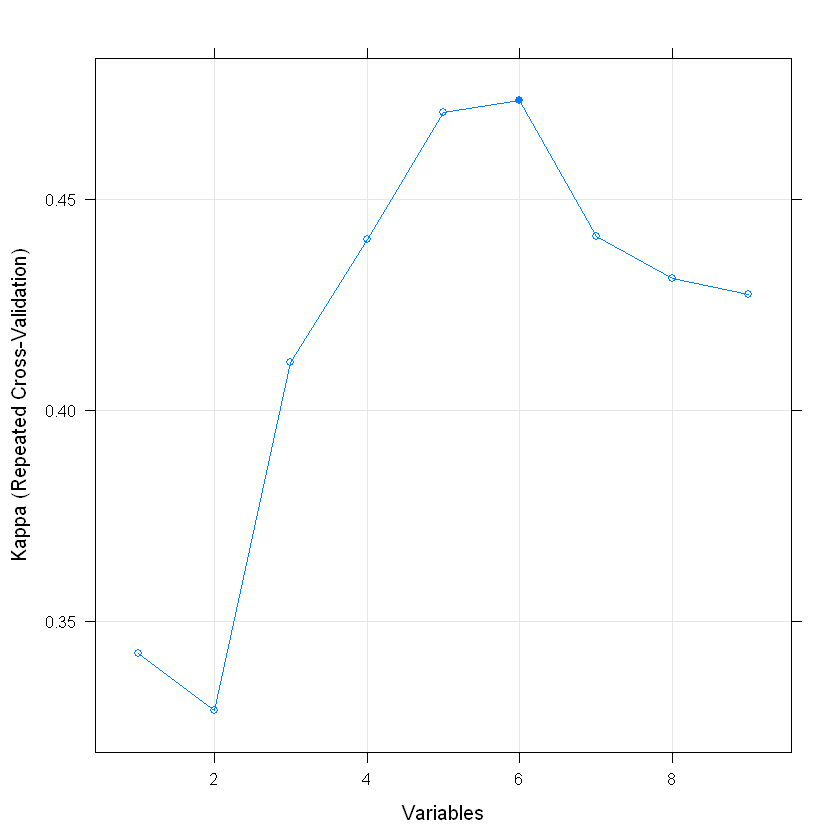

In [8]:
#Review predictors importance
caret::varImp(ml_nb_rfe, scale = F)
plot(ml_nb_rfe, type = c("g", "o"))

## 2.2 Define model

In [9]:
ml_nb_gen <- caret::train(performance ~ problem_solving + organisation
                          + service_orientation + quality + innovation,
                          data = train,
                          method = "nb", tuneLength = 10,
                          trControl = ctrl,
                          metric = "Kappa")

Loading required package: grid
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


## 2.3 Optimise model

Naive Bayes 

182 samples
  5 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 163, 163, 165, 164, 163, 164, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  usekernel  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
  FALSE      0.9663365  0.8308891  0.5391794  0.6565705  0.4563818  0.6495072
   TRUE      1.3038576  0.8177484  0.5296747  0.5759388  0.3675154  0.5758228
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6915873         0.8214859         0.6417078            0.8189645          
  0.6625503         0.7919602         0.6008884            0.7963208          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.6417078       0.6915873    0.2188568            0.7565366             
  0.6008884       0.6625503    0.1919796            0.7272552             

Tuning parameter 'fL

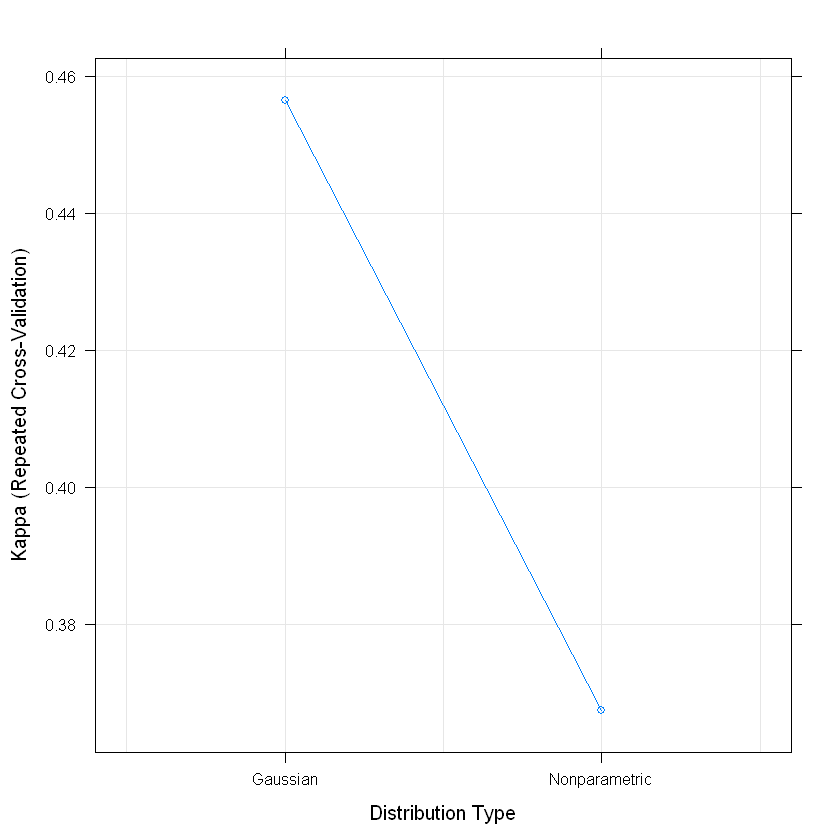

In [10]:
#Review optimised parameters
ml_nb_gen
plot(ml_nb_gen)

In [11]:
#Look up info for Naive Bayes model
modelLookup("nb")

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,nb,fL,Laplace Correction,FALSE,TRUE,TRUE
2,nb,usekernel,Distribution Type,FALSE,TRUE,TRUE
3,nb,adjust,Bandwidth Adjustment,FALSE,TRUE,TRUE


In [12]:
#Define tuneGrid
grid_nb <- expand.grid(fL = 1,
                       usekernel = F,
                       adjust = 0)

In [13]:
#Define final model
ml_nb <- caret::train(performance ~ problem_solving + organisation
                      + service_orientation + quality + innovation,
                      data = train,
                      method = "nb", tuneGrid = grid_nb,
                      trControl = ctrl,
                      metric = "Kappa")


ml_nb

Naive Bayes 

182 samples
  5 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 163, 163, 164, 163, 165, 164, ... 
Addtional sampling using SMOTE

Resampling results:

  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1 
  0.9740036  0.8328104  0.5402569  0.6386493  0.4320037  0.627213
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6715661         0.8122454         0.6234075            0.8124134          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.6234075       0.6715661    0.2128831            0.7419058             

Tuning parameter 'fL' was held constant at a value of 1
Tuning
 parameter 'usekernel' was held constant at a value of FALSE
Tuning
 parameter 'adjust' was held constant at a value of 0

## 2.4 Summary

In [14]:
#Summary of final model
caret::getTrainPerf(ml_nb)
ml_nb$finalModel

TrainlogLoss,TrainAUC,TrainprAUC,TrainAccuracy,TrainKappa,TrainMean_F1,TrainMean_Sensitivity,TrainMean_Specificity,TrainMean_Pos_Pred_Value,TrainMean_Neg_Pred_Value,TrainMean_Precision,TrainMean_Recall,TrainMean_Detection_Rate,TrainMean_Balanced_Accuracy,method
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9740036,0.8328104,0.5402569,0.6386493,0.4320037,0.627213,0.6715661,0.8122454,0.6234075,0.8124134,0.6234075,0.6715661,0.2128831,0.7419058,nb


$apriori
grouping
        C         B         A 
0.1845238 0.3869048 0.4285714 

$tables
$tables$problem_solving
        [,1]     [,2]
C -0.5320909 0.636675
B  0.2222597 0.773640
A  1.0656568 0.636388

$tables$organisation
          [,1]      [,2]
C -0.730014421 0.8940605
B  0.002850439 0.7408145
A  0.979945866 0.4536731

$tables$service_orientation
        [,1]      [,2]
C -0.6145782 0.7512141
B  0.3106015 0.8384795
A  0.8700315 0.7150930

$tables$quality
        [,1]      [,2]
C -0.6955041 0.8995206
B  0.2453801 0.8809492
A  0.9331894 0.8161429

$tables$innovation
         [,1]      [,2]
C -0.24525899 0.9596948
B  0.07879655 0.8315977
A  0.61930058 0.8169163


$levels
[1] "C" "B" "A"

$call
NaiveBayes.default(x = x, grouping = y, usekernel = FALSE, fL = param$fL)

$x
       problem_solving organisation service_orientation     quality innovation
X140         0.6934912   -0.2880380          -1.1626341 -0.69550414 -0.3436871
X149        -0.7791074    1.0820888          -1.1626341 -0.695

ROC curve variable importance

  variables are sorted by maximum importance across the classes
                         C      B      A
problem_solving     0.9372 0.7551 0.9372
organisation        0.9104 0.7561 0.9104
service_orientation 0.8783 0.7056 0.8783
quality             0.8611 0.7213 0.8611
innovation          0.7913 0.6735 0.7913

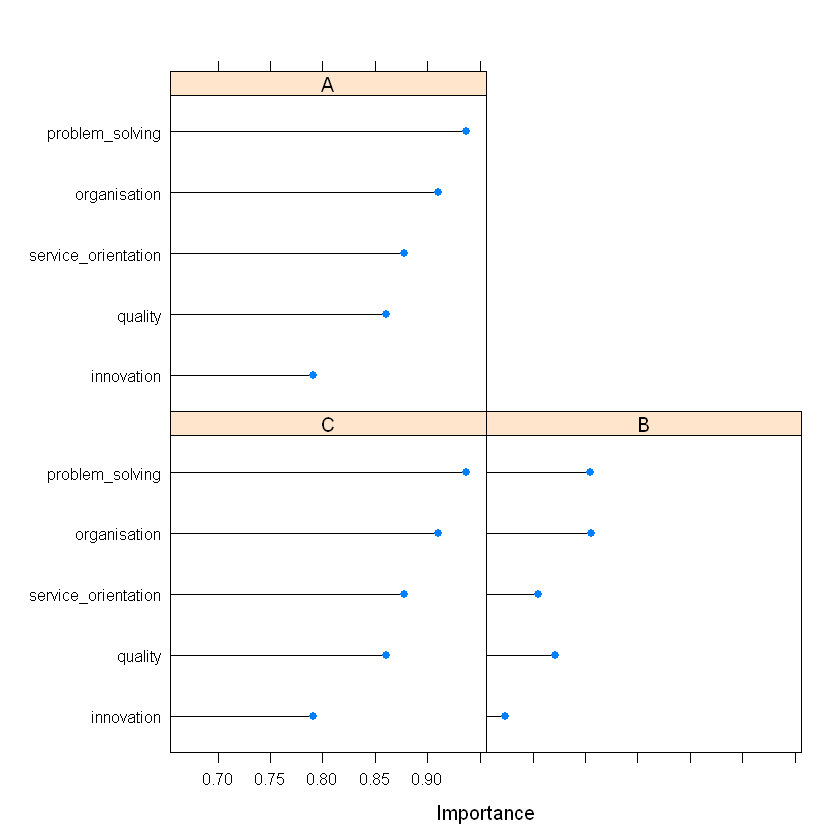

In [15]:
#Predictor importance
(var_nb <- caret::varImp(ml_nb, scale = F))
plot(var_nb)

# 3. Create ML Model: Linear Discriminant Analysis

## 3.1 Selection of predictors

In [16]:
#Process RFE
ml_lda_rfe <- rfe(performance ~ .,
                  data = train,
                  sizes = c(1:9),
                  metric = "Kappa",
                  rfeControl = rfe_lda)

ml_lda_rfe


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 10 times) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.6279 0.3519    0.08717  0.1513         
         2   0.6469 0.3859    0.09175  0.1568         
         3   0.6836 0.4387    0.09353  0.1667         
         4   0.7027 0.4753    0.09451  0.1653        *
         5   0.7022 0.4751    0.08857  0.1543         
         6   0.6961 0.4682    0.09157  0.1584         
         7   0.6947 0.4692    0.10025  0.1736         
         8   0.6881 0.4597    0.09451  0.1639         
         9   0.6874 0.4586    0.09794  0.1723         

The top 4 variables (out of 4):
   problem_solving, organisation, service_orientation, quality


,Overall
,<dbl>
problem_solving,0.8771864
organisation,0.8594943
service_orientation,0.8216901
quality,0.8152094


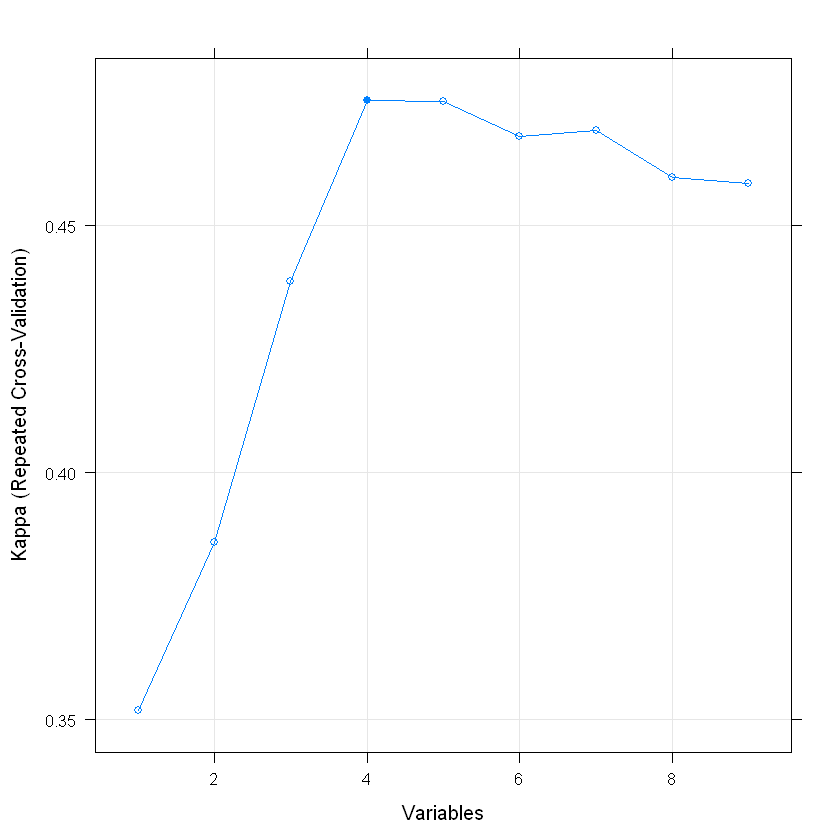

In [17]:
#Review importance of predictors
caret::varImp(ml_lda_rfe, scale = F)
plot(ml_lda_rfe, type = c("g", "o"))

## 3.2 Define model

In [18]:
ml_lda_gen <- caret::train(performance ~ problem_solving + organisation + service_orientation
                           + quality + innovation + determination,
                           data = train,
                           method = "lda", tuneLength = 10,
                           trControl = ctrl,
                           metric = "Kappa",
                           importance = T)


ml_lda_gen

Linear Discriminant Analysis 

182 samples
  6 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 163, 165, 164, 163, 165, 164, ... 
Addtional sampling using SMOTE

Resampling results:

  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
  0.9092333  0.8157409  0.5321274  0.6089962  0.3911994  0.5979431
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6553016         0.7992076         0.6000635            0.8001755          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.6000635       0.6553016    0.2029987            0.7272546             


## 3.3 Optimise model

In [19]:
#Look up info for LDA model
modelLookup("lda")   #no tuning parameters


ml_lda <- ml_lda_gen

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,lda,parameter,parameter,FALSE,TRUE,TRUE


## 3.4 Summary

In [20]:
#Summary of the final model
getTrainPerf(ml_lda)
ml_lda$finalModel

TrainlogLoss,TrainAUC,TrainprAUC,TrainAccuracy,TrainKappa,TrainMean_F1,TrainMean_Sensitivity,TrainMean_Specificity,TrainMean_Pos_Pred_Value,TrainMean_Neg_Pred_Value,TrainMean_Precision,TrainMean_Recall,TrainMean_Detection_Rate,TrainMean_Balanced_Accuracy,method
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9092333,0.8157409,0.5321274,0.6089962,0.3911994,0.5979431,0.6553016,0.7992076,0.6000635,0.8001755,0.6000635,0.6553016,0.2029987,0.7272546,lda


Call:
lda(x, y, importance = ..1)

Prior probabilities of groups:
        C         B         A 
0.2023810 0.3690476 0.4285714 

Group means:
  problem_solving organisation service_orientation    quality innovation
C      -0.8830556   -0.5862421          -0.6175090 -0.7791669 -0.5231736
B       0.2517116    0.3881859           0.2324173  0.1991476  0.3699165
A       1.0263440    0.9955631           0.8967275  0.9540026  0.7204215
  determination
C    -0.1853281
B     0.2575914
A     0.2692439

Coefficients of linear discriminants:
                           LD1         LD2
problem_solving      0.6905067  0.09087984
organisation         0.5976341 -0.07085385
service_orientation  0.3733228  0.51109617
quality              0.2151611  0.17883835
innovation           0.2167677 -0.67230864
determination       -0.2995964 -0.77442396

Proportion of trace:
   LD1    LD2 
0.9889 0.0111 

ROC curve variable importance

  variables are sorted by maximum importance across the classes
                         C      B      A
problem_solving     0.9372 0.7551 0.9372
organisation        0.9104 0.7561 0.9104
service_orientation 0.8783 0.7056 0.8783
quality             0.8611 0.7213 0.8611
innovation          0.7913 0.6735 0.7913
determination       0.6227 0.5806 0.6227

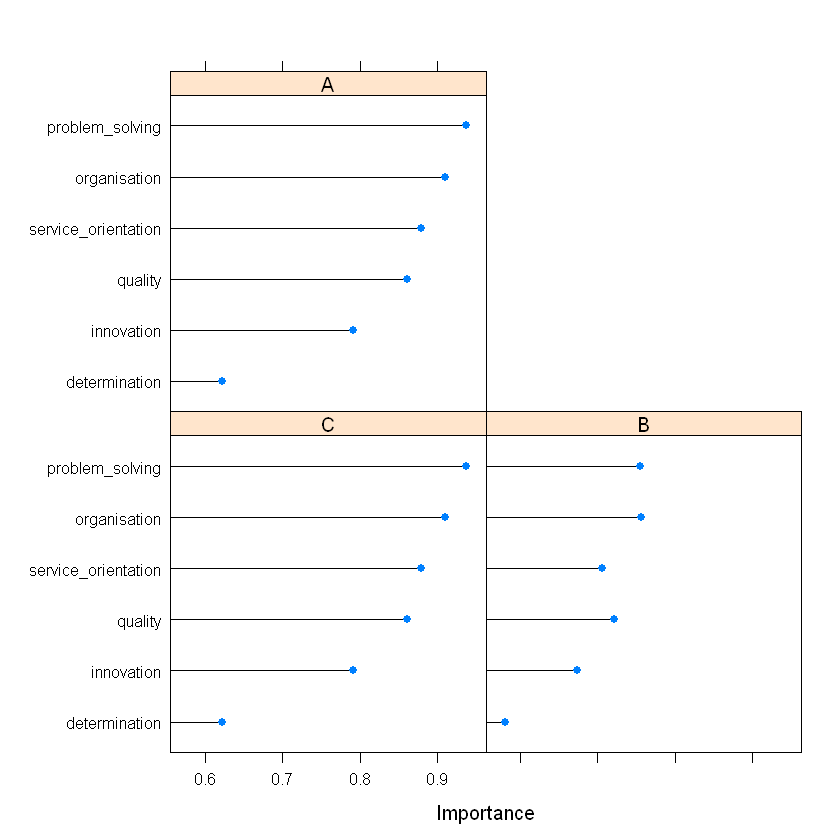

In [21]:
#Importance of predictors
(var_lda <- varImp(ml_lda, scale = F))
plot(var_lda)

# 4. Create model: Random Forest

## 4.1 Selection of predictors

In [22]:
#Process RFE
ml_forest_rfe <- rfe(performance ~ .,
                     data = train,
                     sizes = c(1:9),
                     metric = "Kappa",
                     rfeControl = rfe_rf)

ml_forest_rfe


Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 10 times) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.6137 0.3356    0.10177  0.1750         
         2   0.6177 0.3106    0.09080  0.1706         
         3   0.7183 0.4897    0.10087  0.1859        *
         4   0.6875 0.4454    0.11421  0.2053         
         5   0.6445 0.3809    0.09984  0.1766         
         6   0.6417 0.3732    0.09667  0.1726         
         7   0.6579 0.3906    0.10412  0.1898         
         8   0.6652 0.4005    0.09450  0.1725         
         9   0.6594 0.3883    0.10670  0.1956         

The top 3 variables (out of 3):
   problem_solving, organisation, quality


,Overall
,<dbl>
problem_solving,14.688904
organisation,10.323213
quality,8.280853
service_orientation,7.355129


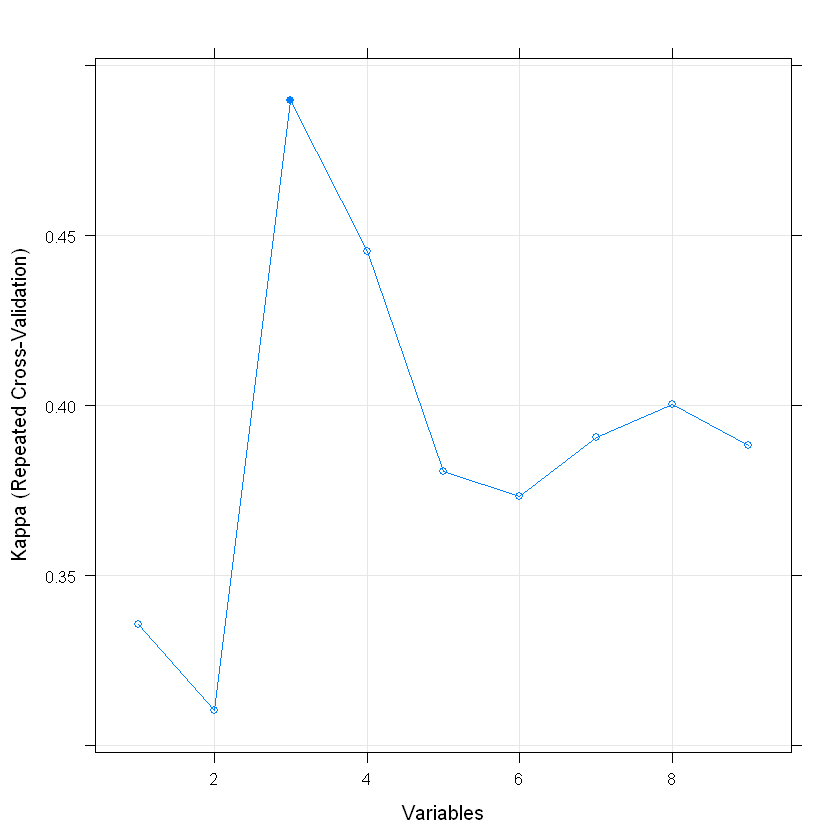

In [23]:
#Review importance of predictors
caret::varImp(ml_forest_rfe, scale = F)
plot(ml_forest_rfe, type = c("g", "o"))

## 4.2 Define model

In [24]:
ml_forest_gen <- caret::train(performance ~ problem_solving+organisation+
                              quality+innovation+service_orientation+determination,
                              data = train,
                              method = "rf", tuneLength = 10,
                              trControl = ctrl,
                              metric = "Kappa")

note: only 5 unique complexity parameters in default grid. Truncating the grid to 5 .



## 4.3 Optimise model

Random Forest 

182 samples
  6 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 165, 163, 165, 163, 164, 163, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  mtry  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
  2     0.9907033  0.8162003  0.5357347  0.6679082  0.4503277  0.6487182
  3     1.0977884  0.8196470  0.5407213  0.6560222  0.4268924  0.6424987
  4     1.2134160  0.8116501  0.5360347  0.6579955  0.4311174  0.6495424
  5     1.4152782  0.7959834  0.5200459  0.6217621  0.3723881  0.6080831
  6     1.5662151  0.8097597  0.5305959  0.6489615  0.4151350  0.6390397
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6707725         0.8141677         0.6657907            0.8177279          
  0.6561693         0.8052720         0.6586932            0.8098004          
  0.6598095         0.8078033         0.

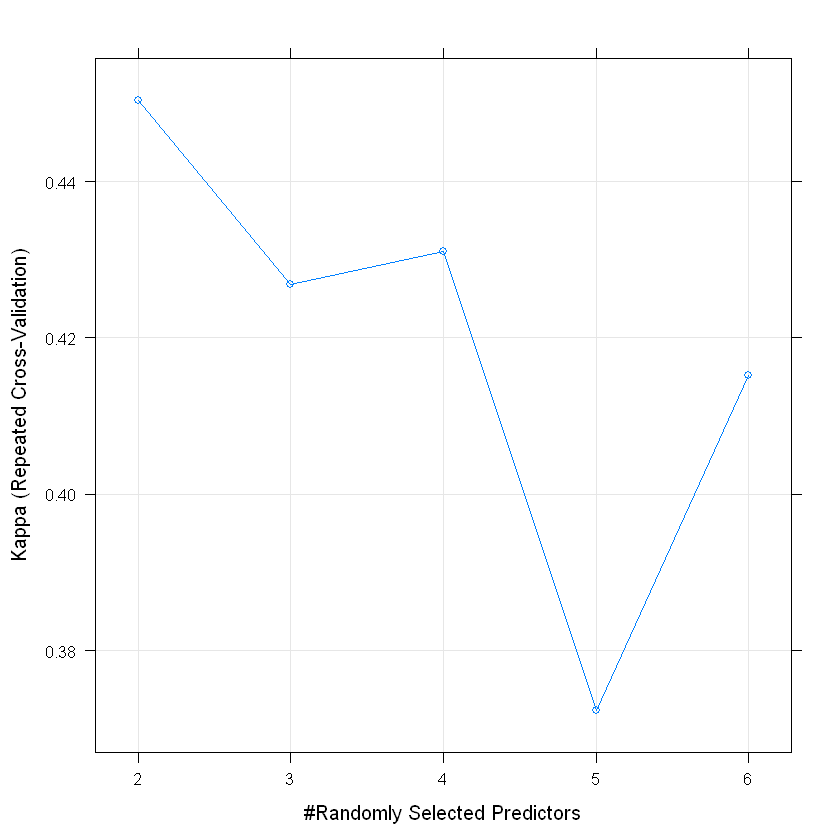

In [25]:
#View optimised parameters
ml_forest_gen
plot(ml_forest_gen)

In [26]:
#Look up info for Random Forest model
modelLookup("rf")

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,rf,mtry,#Randomly Selected Predictors,TRUE,TRUE,TRUE


In [27]:
#Define tuneGrid
grid_forest <- expand.grid(mtry = 2)

In [28]:
#Define final model
ml_forest <- caret::train(performance ~ problem_solving+organisation+
                          quality+innovation+service_orientation+determination,
                          data = train,
                          method = "rf", tuneGrid = grid_forest,
                          trControl = ctrl)


ml_forest

Random Forest 

182 samples
  6 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 164, 163, 165, 164, 164, 164, ... 
Addtional sampling using SMOTE

Resampling results:

  logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1 
  0.9408779  0.8274277  0.5469524  0.6513682  0.4238315  0.647398
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6524444         0.8049386         0.6408345            0.8078598          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.6408345       0.6524444    0.2171227            0.7286915             

Tuning parameter 'mtry' was held constant at a value of 2

## 4.4 Summary

In [29]:
#Summary of final model
caret::getTrainPerf(ml_forest)
ml_forest$finalModel

TrainlogLoss,TrainAUC,TrainprAUC,TrainAccuracy,TrainKappa,TrainMean_F1,TrainMean_Sensitivity,TrainMean_Specificity,TrainMean_Pos_Pred_Value,TrainMean_Neg_Pred_Value,TrainMean_Precision,TrainMean_Recall,TrainMean_Detection_Rate,TrainMean_Balanced_Accuracy,method
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.9408779,0.8274277,0.5469524,0.6513682,0.4238315,0.647398,0.6524444,0.8049386,0.6408345,0.8078598,0.6408345,0.6524444,0.2171227,0.7286915,rf



Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.45%
Confusion matrix:
   C  B  A class.error
C 24 13  1  0.36842105
B  8 48  2  0.17241379
A  0  7 65  0.09722222

rf variable importance

                    Overall
organisation         25.219
problem_solving      18.038
determination        17.991
quality              16.546
service_orientation   8.111
innovation            7.151

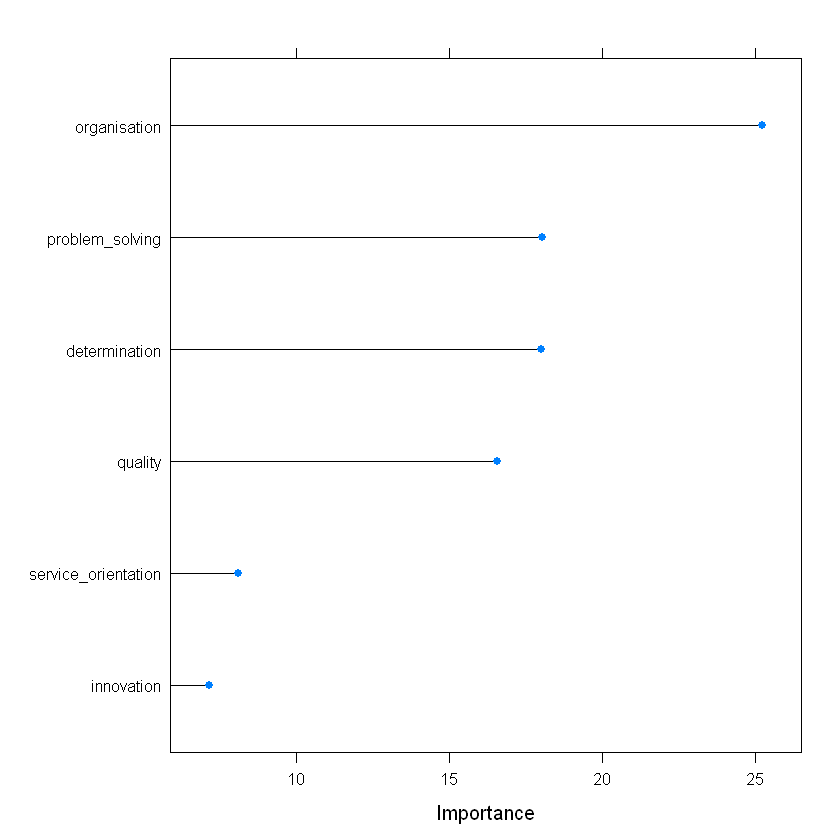

In [30]:
#Importance of variables
(var_forest <- caret::varImp(ml_forest, scale = F))
plot(var_forest)

# 5. Create model: Non-Linear Support Vector Machines

## 5.1 Selection of predictors

In [31]:
#Process RFE
ml_gen_rfe <- rfe(performance ~ .,
                  data = train,
                  sizes = c(1:9),
                  metric = "Kappa",
                  rfeControl = rfe_gen)

ml_gen_rfe

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters i

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .




Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables Accuracy   Kappa AccuracySD KappaSD Selected
         1   0.4929 0.09808    0.09776  0.1710         
         2   0.4777 0.08543    0.08524  0.1475         
         3   0.5133 0.15576    0.09397  0.1710         
         4   0.5326 0.18588    0.11130  0.1967         
         5   0.5975 0.28908    0.11980  0.2098         
         6   0.5915 0.27563    0.10985  0.1932         
         7   0.6266 0.32608    0.09508  0.1699         
         8   0.6384 0.35474    0.09928  0.1753         
         9   0.6721 0.40927    0.09588  0.1714        *

The top 5 variables (out of 9):
   curiosity, analysis, problem_solving, organisation, determination


,Overall
,<dbl>
curiosity,14.295735
analysis,12.267860
problem_solving,11.540779
organisation,11.103267
determination,11.014279
empowerment,9.395342
quality,8.416893
service_orientation,6.513806
innovation,6.426620


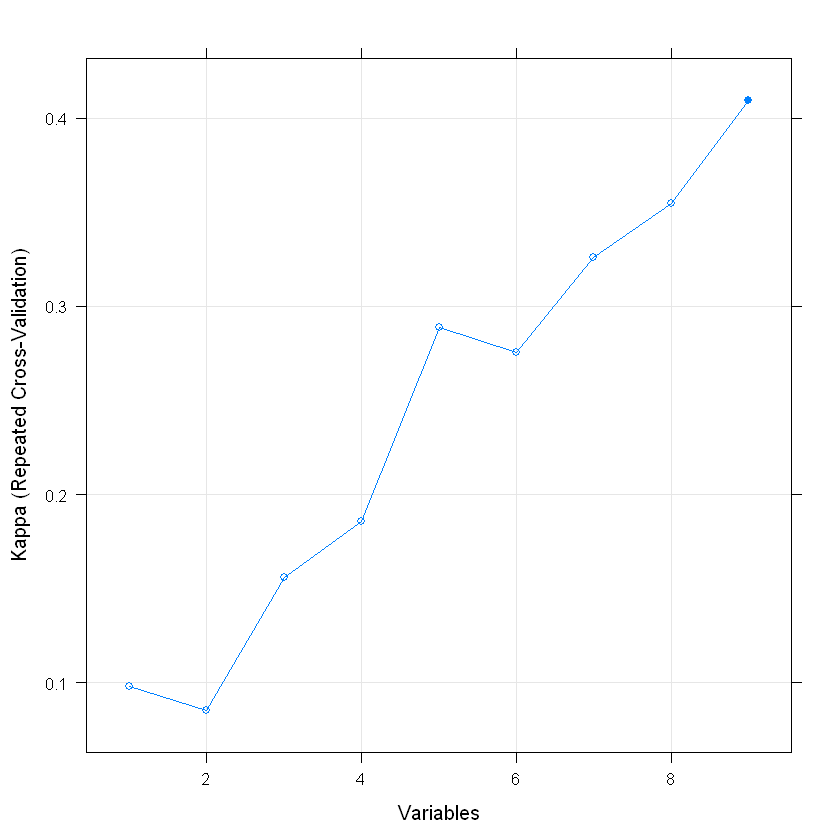

In [32]:
#Review importance of predictors
caret::varImp(ml_gen_rfe, scale = F)
plot(ml_gen_rfe, type = c("g", "o"))

## 5.2 Define model

In [33]:
#Train model
ml_svmnl_gen <- caret::train(performance ~ organisation+curiosity+problem_solving+
                             analysis+determination+empowerment+quality+
                             innovation+service_orientation,
                             data = train,
                             method = "svmRadial", tuneLength = 10,
                             trControl = ctrl,
                             importance = T,
                             metric = "Kappa")

## 5.3 Optimise model

Support Vector Machines with Radial Basis Function Kernel 

182 samples
  9 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 163, 163, 165, 165, 163, 162, ... 
Addtional sampling using SMOTE

Resampling results across tuning parameters:

  C       logLoss    AUC        prAUC      Accuracy   Kappa      Mean_F1  
    0.25  0.8177703  0.8189882  0.5401031  0.6498653  0.4331690  0.6432807
    0.50  0.7997042  0.8109700  0.5314659  0.6424348  0.4213324  0.6343127
    1.00  0.8224906  0.8045115  0.5279383  0.6235499  0.3847357  0.6106127
    2.00  0.8373109  0.7926407  0.5125165  0.6087993  0.3576280  0.5977411
    4.00  0.8770227  0.7790315  0.5023402  0.5896271  0.3213528  0.5773237
    8.00  0.8668527  0.7796519  0.5008637  0.5946723  0.3271239  0.5864388
   16.00  0.9063821  0.7694590  0.4904748  0.5668390  0.2809001  0.5683019
   32.00  0.9413020  0.7587529  0.4817359  0.5932329  0.3164040  0.5888

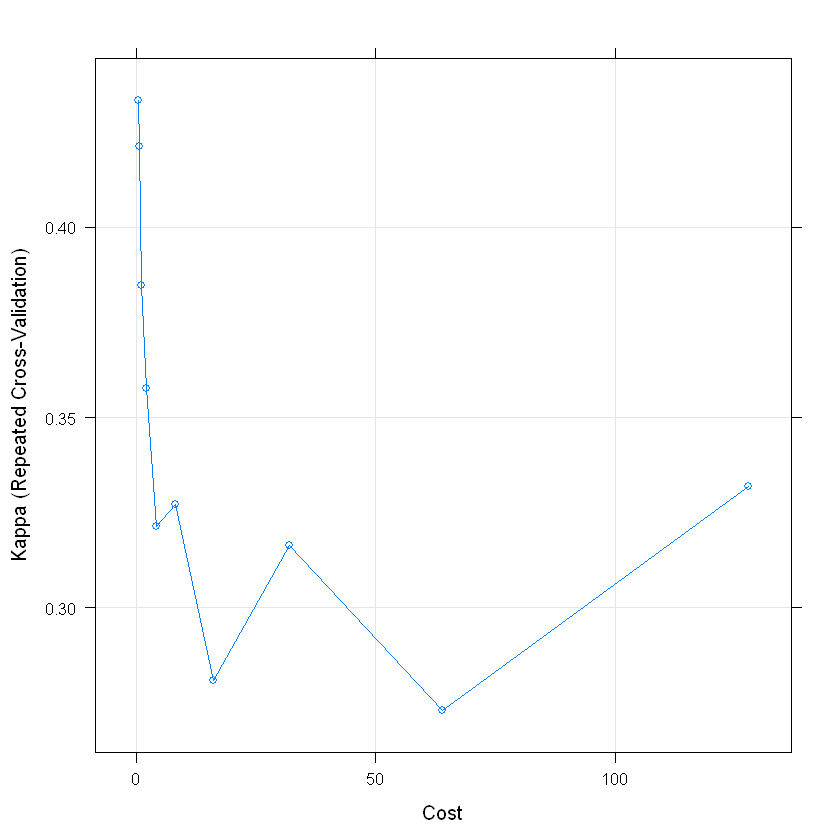

In [34]:
#Review optimised parameters
ml_svmnl_gen
plot(ml_svmnl_gen)

In [35]:
#Look up info for model svmboost
modelLookup("svmRadial")

,model,parameter,label,forReg,forClass,probModel
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>
1,svmRadial,sigma,Sigma,TRUE,TRUE,TRUE
2,svmRadial,C,Cost,TRUE,TRUE,TRUE


In [36]:
#Define tuneGrid
grid_svmnl <- expand.grid(C = .5,
                          sigma = .09128954)

In [37]:
#Define model
ml_svmnl <- caret::train(performance ~ organisation+curiosity+problem_solving+
                         analysis+determination+empowerment+quality+
                         innovation+service_orientation,
                         data = train,
                         method = "svmRadial", tuneGrid = grid_svmnl,
                         trControl = ctrl,
                         importance = T)


ml_svmnl

Support Vector Machines with Radial Basis Function Kernel 

182 samples
  9 predictor
  3 classes: 'C', 'B', 'A' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 163, 163, 163, 164, 163, 165, ... 
Addtional sampling using SMOTE

Resampling results:

  logLoss    AUC        prAUC      Accuracy   Kappa     Mean_F1  
  0.8105747  0.8058762  0.5261541  0.6331933  0.407063  0.6196171
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.654127          0.7999529         0.6286079            0.8029165          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  0.6286079       0.654127     0.2110644            0.7270399             

Tuning parameter 'sigma' was held constant at a value of 0.09128954

Tuning parameter 'C' was held constant at a value of 0.5

## 5.4 Summary

In [38]:
#Summary of final model
getTrainPerf(ml_svmnl)
ml_svmnl$finalModel

TrainlogLoss,TrainAUC,TrainprAUC,TrainAccuracy,TrainKappa,TrainMean_F1,TrainMean_Sensitivity,TrainMean_Specificity,TrainMean_Pos_Pred_Value,TrainMean_Neg_Pred_Value,TrainMean_Precision,TrainMean_Recall,TrainMean_Detection_Rate,TrainMean_Balanced_Accuracy,method
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.8105747,0.8058762,0.5261541,0.6331933,0.407063,0.6196171,0.654127,0.7999529,0.6286079,0.8029165,0.6286079,0.654127,0.2110644,0.7270399,svmRadial


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 0.5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.09128954 

Number of Support Vectors : 136 

Objective Function Value : -20.8486 -9.0947 -34.9729 
Training error : 0.214286 
Probability model included. 

ROC curve variable importance

  variables are sorted by maximum importance across the classes
                         C      B      A
problem_solving     0.9372 0.7551 0.9372
organisation        0.9104 0.7561 0.9104
service_orientation 0.8783 0.7056 0.8783
quality             0.8611 0.7213 0.8611
innovation          0.7913 0.6735 0.7913
curiosity           0.6428 0.6428 0.6204
determination       0.6227 0.5806 0.6227
analysis            0.6117 0.6117 0.5774
empowerment         0.5568 0.5702 0.5702

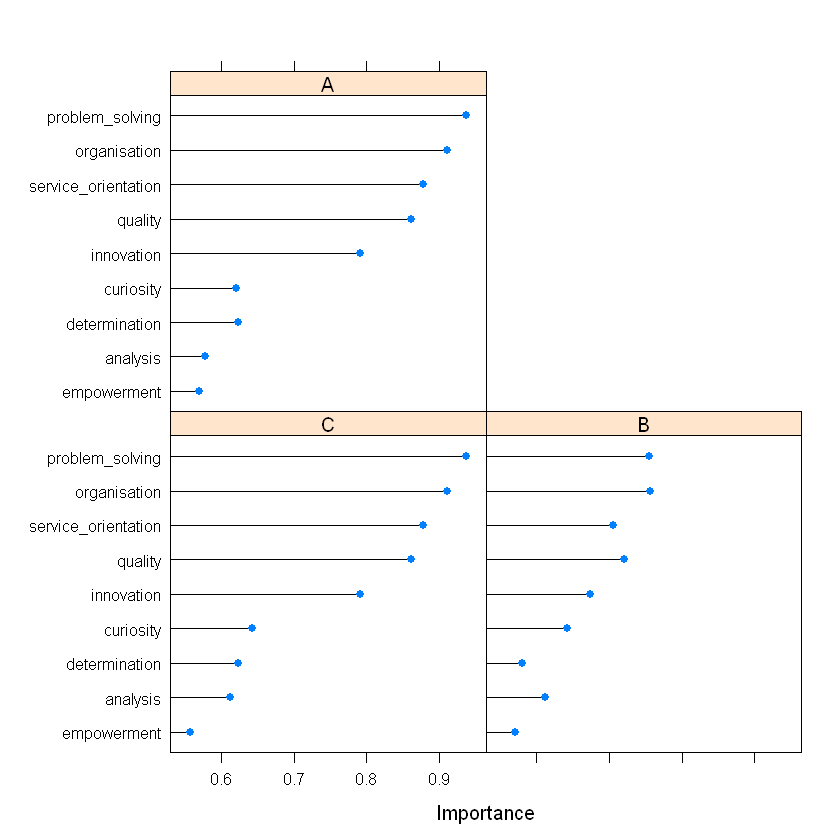

In [39]:
#Importance of variables
(var_svmnl <- caret::varImp(ml_svmnl, scale = F))
plot(var_svmnl)

# 6. Save workspace
To use the workspace in the next notebook, I will save it as an R object to be able to import it into other notebooks.

In [40]:
save.image(file = "03_Objects/modelling.RData")